In [28]:
import tkinter # Standard Python interface
from tkinter import filedialog # Standard Python interface - File dialog
import os # For operating system dependent functionality
import glob # Find all the pathnames matching a specified pattern
import numpy as np # A powerful N-dimensional array object
import pandas as pd # Data frame manipulation
import cv2 # OpenCV array structures are converted to and from Numpy arrays - For reading Images
import sys # System specific functions
from keras.models import model_from_json # Loading saved model
import matplotlib.pyplot as plt

In [2]:
# load json
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Create model
loaded_model = model_from_json(loaded_model_json)
# Add weights to the model
loaded_model.load_weights("model2.h5")

# Compile model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
# Create testing data from the images present in impdir
# Function to read the images in gray scale and resize the image
def load_test(impdir):
    X_test = [] # Resized image
    driver_id_test = [] # Driver ID
    
    print('Read images')
    
    # Create path to read all the jpg files present in the directory
    path = r'' + impdir + '/*.jpg'
    
    # Glob will help to read all the images from each folder
    files = glob.glob(path)
    
    # If no images are found then return error message
    if(files == []):
        # Display error message
        print('No images Found... Please Select proper directory')
        print()
        # Stop the program
        sys.exit("Service terminated")
    
    # Iterate to read each image
    for fl in files:
        
        # Take only the base name i.e., img_name.jpg
        flbase = os.path.basename(fl)
            
        # Read images in gray scale
        img = cv2.imread(fl, 0)
        # Resize the image
        img_resized = cv2.resize(img,(224,224))
        
        # Append Resized image
        X_test.append(img_resized)
        # Append Driver ID
        driver_id_test.append(flbase)
        
    return np.array(X_test, dtype=np.uint8), driver_id_test;

In [51]:
# Service definition to classify images into 5 categories as follows:
# The 10 classes to predict are:
    # c0: safe driving
    # c1: texting - right
    # c2: talking on the phone - right
    # c3: texting - left
    # c4: talking on the phone - left
# Parameters to pass - Directory for input images and for output results to be stored by the model

def distracted_driver_classification():
   
    # Used to open a dialog for selecting the testing image folder
    root = tkinter.Tk()
    # Used to hide tkinter window
    root.withdraw()
    
    # For initializing the dialog to current directory
    currdir = os.getcwd()
    
    print("Please select input directory")
    
    # Store the path selected - input
    impdir = filedialog.askdirectory(parent=root, initialdir=currdir, title='Please select input directory')
    if len(impdir) > 0:
        # Display the input directory if present
        print("You chose input %s" % impdir)
        print()
    else:
        # Display error message
        print('No images Found... Please Select proper input directory')
        print()
        # Stop the program
        sys.exit("Service terminated")
        
    print("Please select output directory")
    
    # Store the path selected - output
    outdir = filedialog.askdirectory(parent=root, initialdir=currdir, title='Please select output directory')
    if len(outdir) > 0:
        # Display the output directory if present
        print("You chose output %s" % outdir)
        print()
    else:
        # Display error message
        print('Please Select proper output directory')
        print()
        # Stop the program
        sys.exit("Service terminated")
    
    # Load all the testing image data
    X_test, driver_id_test = load_test(impdir)
    
    # Normalized the data (divide by 255 because colour (Gray-scale) range lies between 0 to 255)
    X_test = X_test.astype('float32')
    X_test /= 255
    
    # Convert the 2D Dimension to 3D so that we can pass the image to CNN
    X_test = X_test.reshape(X_test.shape[0], 224, 224,1)
    
    # Prob prediction for each class
    pred = loaded_model.predict(X_test)

    # Class prediction
    pred_class = loaded_model.predict_classes(X_test)
    
    # Map the class prediction to actual value
    result_class = []
    for pred in pred_class:
        if pred == 0:
            result_class.append("safe driving")
        elif pred == 1:
            result_class.append("texting - right")
        elif pred == 2:
            result_class.append("talking on the phone - right")
        elif pred == 3:
            result_class.append("texting - left")
        else:
            result_class.append("talking on the phone - left")
        
    
#     print(result_class[0])
#     print(driver_id_test[0])
    
    test_imgs = []
    path='./test_final/'
    for i in range(len(driver_id_test)):
        img = cv2.imread(path+str(driver_id_test[i]))
        test_imgs.append(img)
        
    #Loop for Lableling the pictures
    result_index=0
    for img in test_imgs:
        
        cv2.rectangle(img, (40, 52), (320, 8), (255,255,255), cv2.FILLED)
        cv2.rectangle(img, (40, 52), (320, 8), (0,0,0), 3)
        cv2.putText(img, str(result_class[result_index]), (42, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.15, (0, 0, 255), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        result_index=result_index+1
        
    # Create a data frame from Driver ID and its classification
    #result = pd.DataFrame({'driver_id':driver_id_test,'result_class':result_class})
    
   
    # Save the results to CSV
#     result.to_csv(outdir +'/ Distracted Driver results.csv', sep=',')
    
    # Print message for successful run
    print()
    print("File has been successfully written to %s" % outdir)
    ;

Please select input directory
You chose input D:/Machine Learning Projects/test/test_final

Please select output directory
You chose output D:/Machine Learning Projects/test

Read images


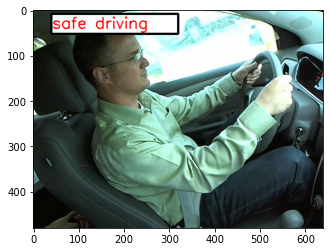

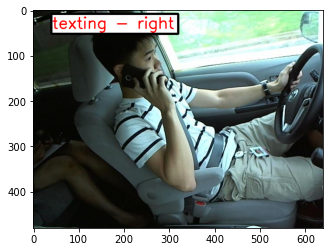

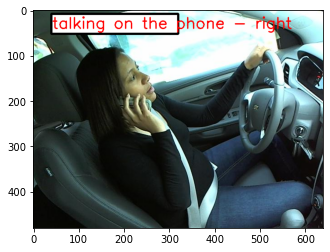

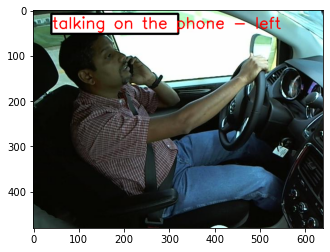

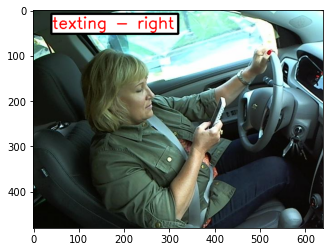

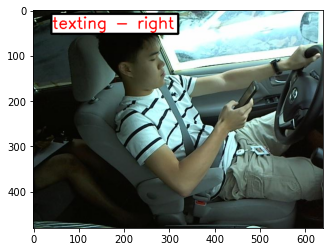

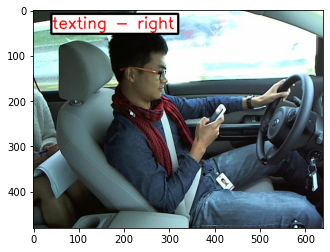

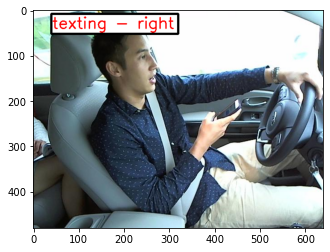

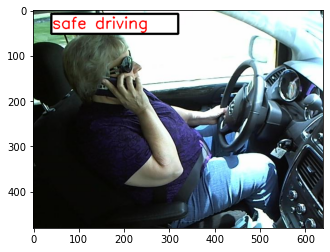

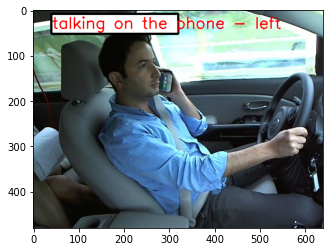

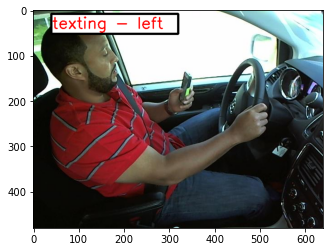

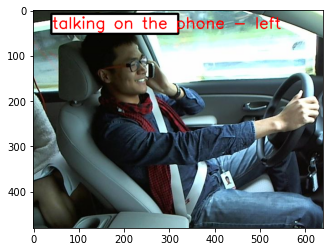

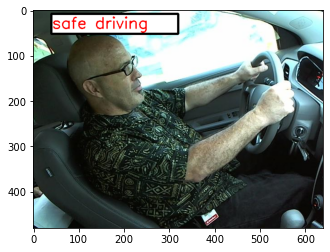

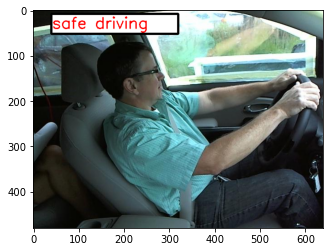

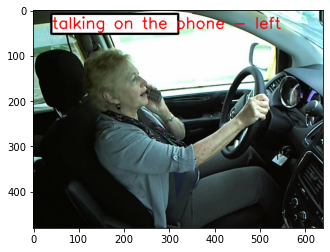

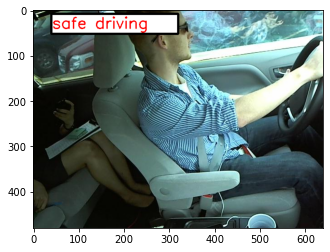

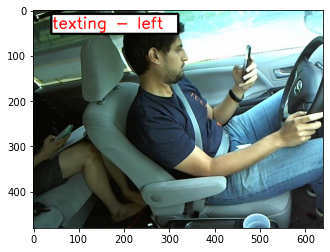

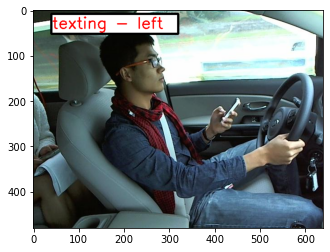

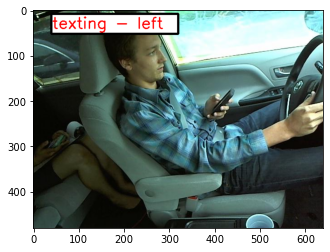

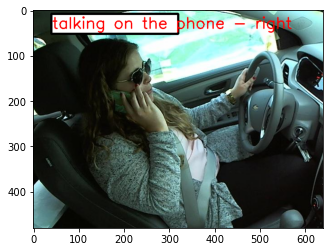


File has been successfully written to D:/Machine Learning Projects/test


In [52]:
# Service call to classify images into 5 categories as follows:
# The 10 classes to predict are:
    # c0: safe driving
    # c1: texting - right
    # c2: talking on the phone - right
    # c3: texting - left
    # c4: talking on the phone - left
distracted_driver_classification()